In [1]:
%config InlineBackend.figure_format='retina'
%matplotlib inline

import numpy as np
np.random.seed(123)
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (8, 8)
plt.rcParams["font.size"] = 14
from sklearn.utils import check_random_state

In [11]:
# Question 1

from sklearn.datasets import make_blobs
from sklearn.neighbors import KNeighborsClassifier

labels = ["b", "r"]
X, y = make_blobs(n_samples=400, centers=23, random_state=42)
y = np.take(labels, (y < 10))

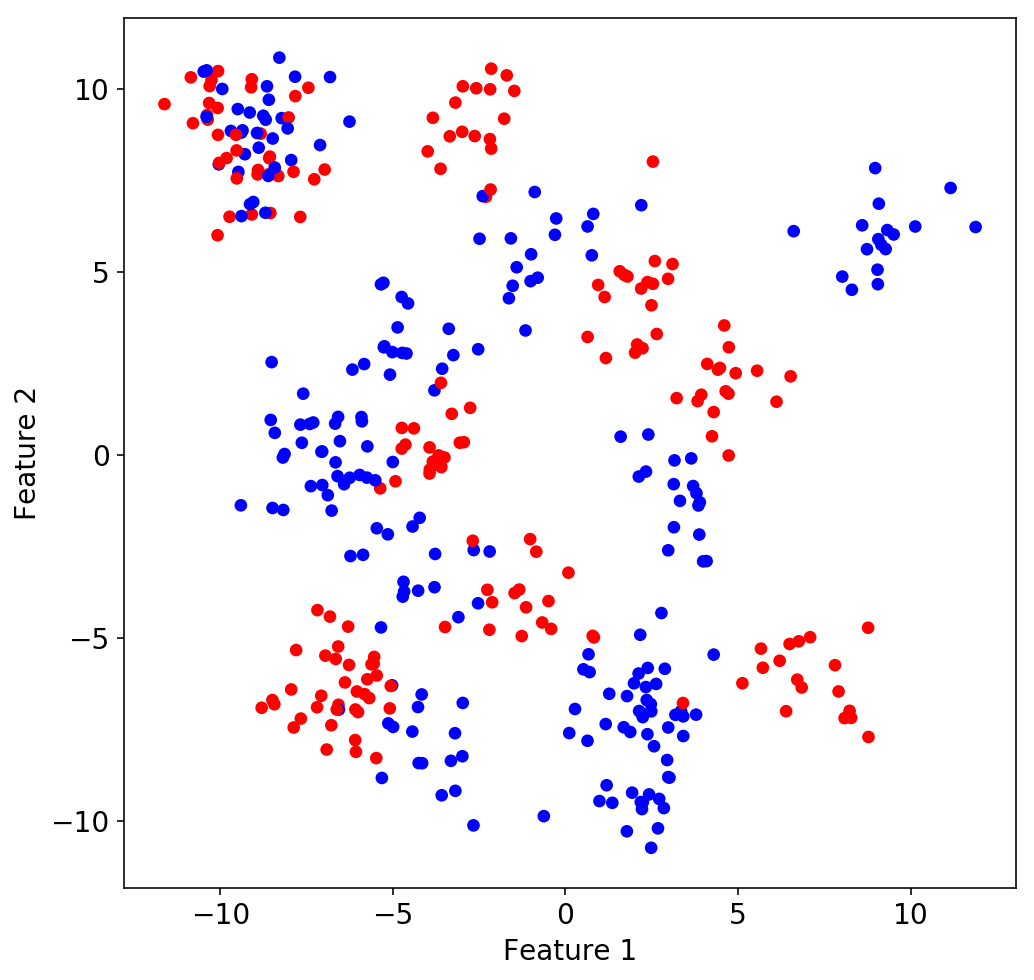

In [12]:
plt.scatter(X[:, 0], X[:, 1], c=y, lw=0, s=40)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")

In [13]:
# Splitting the data
from sklearn.model_selection import train_test_split

# Randomly splitting the data (instead of splitting it by index or other criterion)
# avoids artifacts if data has some structure initially.
#Training on 50% of the data and testing the other half sounds reasonable
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.5)

In [14]:
# Training
clf = KNeighborsClassifier(n_neighbors=3)
clf.fit(X_train, y_train);

In [15]:
# Testing

from sklearn.metrics import accuracy_score

print('Accuracy train:', accuracy_score(y_train, clf.predict(X_train)))
print('Accuracy test:', accuracy_score(y_test, clf.predict(X_test)))

Accuracy train: 0.89
Accuracy test: 0.885


In [16]:
# Repeat for different splits
splits = np.linspace(0.1,0.9,9)
acc_train = []
acc_test = []
for split in splits:
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=split)
    # Training
    clf = KNeighborsClassifier(n_neighbors=3)
    clf.fit(X_train, y_train)
    acc_train.append(accuracy_score(y_train, clf.predict(X_train)))
    acc_test.append(accuracy_score(y_test, clf.predict(X_test)))

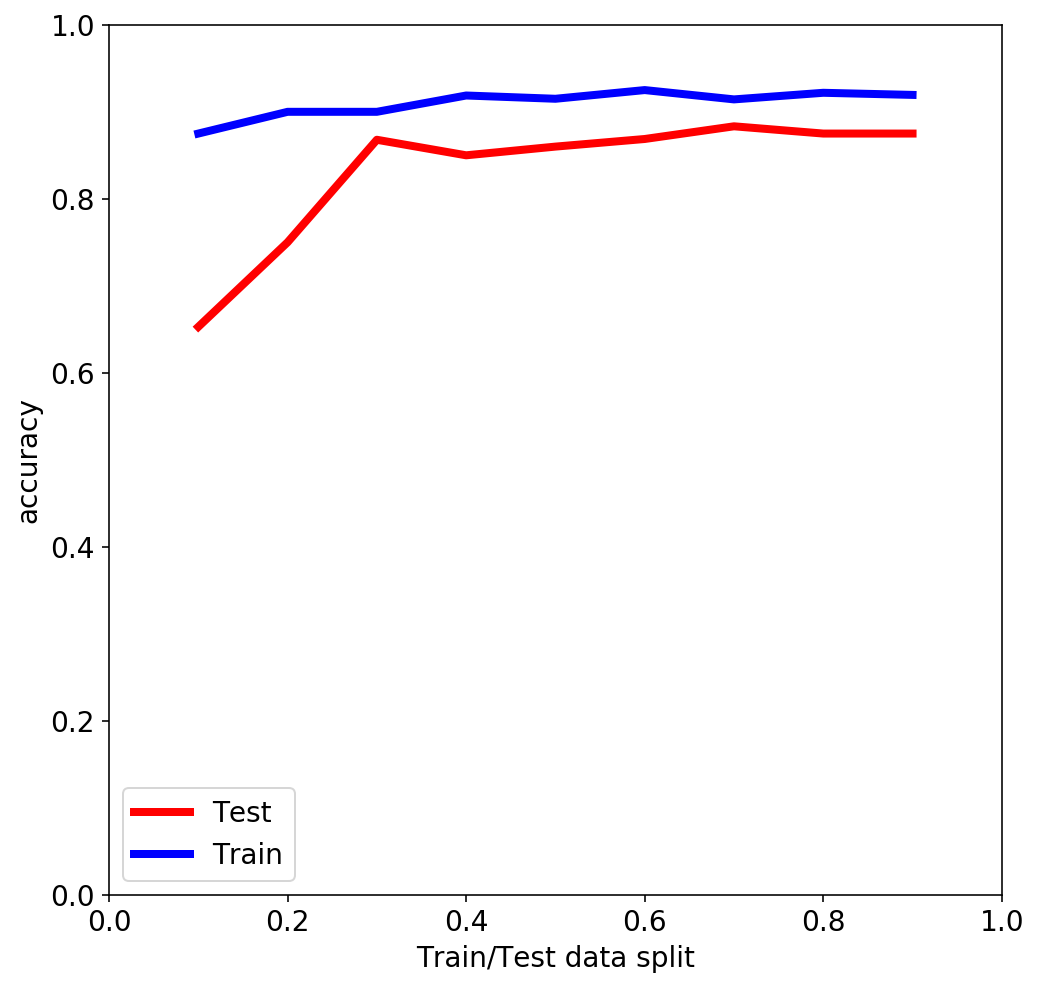

In [17]:
# Plot results
plt.plot(splits, np.array(acc_test), label='Test', c='r', lw=4)
plt.plot(splits, np.array(acc_train), label='Train', c='b', lw=4)
plt.xlabel('Train/Test data split')
plt.ylabel('accuracy')
plt.legend(loc='best')
plt.xlim((0, 1.))
plt.ylim((0, 1.));

In [ ]:
# The data is quite noisy, but we see a structure:
# * The training data is overall better than the testing data,
#   unsurprisingly, as it was actually used for the training.
# * At a small training size, the accuracy is smaller (because less data was used for training),
#   especially for the test data (because it is different from the trainig data)